In [190]:
import numpy as np
# from geometry import centroid, conjugate, translate, intersects, complex2cart, PSI, PSI2, Polygon

from penrisk.penrose import RobinsonTriangle, FatRhombus, ThinRhombus, make_svg, write_svg, create_tiling
from penrisk.penrose import create_penrose_rhombus, overlay_tiles, find_minmax, rotation_angle, normalize_rotation
from penrisk.image_proc import create_mask
from penrisk.geometry import centroid, isclose

import cv2
from scipy import ndimage
from pathlib import Path
from matplotlib import pyplot as plt
import os
%reload_ext autoreload
%autoreload 2

In [191]:
source_image = "dream_widow.jpg"
source_image = "map.png"
source_image = "bhole.png"

# Create individual images with the tile rotated and centered.
output_dir = Path("fab")
os.makedirs(output_dir, exist_ok=True)

# Generate a set of tiles that have the given side length
# This will iterate until the set of tiles completely covers the input image.
image = cv2.imread(source_image, cv2.IMREAD_UNCHANGED)
# if image.shape[2] < 4:
side_length = 650 # 650
N = 16

tiling = create_tiling(side_length, image.shape, N)

tiled_image = image.copy()
# Overlay the tiles onto the image.
overlay_tiles(tiling, tiled_image, "tiled.png", stroke_width=1, stroke_color=(255, 255, 255, 255))
print(f"Number of tiles: {len(tiling)}")
svg = make_svg(tiling, stroke_width=1.5)
write_svg(svg, "tiling.svg")

Number of tiles: 17


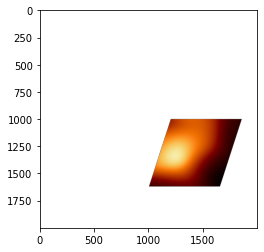

In [192]:
tile = tiling[11]
# 9 is center. 10 is top right. 11 is bottom right. 4 is left.

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)

mask = create_mask(tile, rgb_image)
cv2.imwrite("mask.png", mask)

masked_image = cv2.bitwise_and(rgb_image, mask)

cv2.imwrite("masked.png", masked_image)
plt.imshow(masked_image)
plt.show()

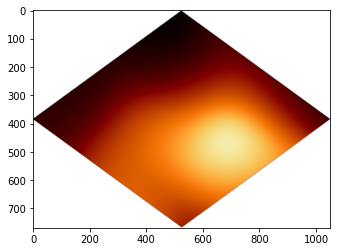

True

In [195]:
# Rotate and reshape.
theta = rotation_angle(tile)
rotated = normalize_rotation(masked_image, theta, margin=0)

plt.imshow(rotated)
plt.show()

rotated_col = cv2.cvtColor(rotated, cv2.COLOR_RGBA2BGRA)
cv2.imwrite('rotated.png', rotated_col)
print()